Importing necessary libraries and reading the input df.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Preprocessing and Feature Engineering

In this section, we will preprocess the data and perform feature engineering to prepare it for modeling. This includes handling missing values, encoding categorical variables, and creating new features that may improve the performance of our models.

In [18]:
df = pd.read_csv('../../data/Property Value Regression/train_upto_600.csv')


In [19]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28896 entries, 0 to 28895
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              28896 non-null  object 
 1   UNDER_CONSTRUCTION     28896 non-null  int64  
 2   RERA                   28896 non-null  int64  
 3   BHK_NO.                28896 non-null  int64  
 4   BHK_OR_RK              28896 non-null  object 
 5   SQUARE_FT              28896 non-null  float64
 6   READY_TO_MOVE          28896 non-null  int64  
 7   RESALE                 28896 non-null  int64  
 8   ADDRESS                28896 non-null  object 
 9   LONGITUDE              28896 non-null  float64
 10  LATITUDE               28896 non-null  float64
 11  TARGET(PRICE_IN_LACS)  28896 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.6+ MB


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,28896.000000,28896.000000,28896.000000,2.889600e+04,28896.000000,28896.000000,28896.000000,28896.000000,28896.000000
mean,0.178779,0.316341,2.367733,1.556069e+03,0.821221,0.933762,21.333339,76.880314,86.753459
std,0.383174,0.465056,0.841814,2.651383e+04,0.383174,0.248701,6.231353,10.601359,82.116025
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,8.982094e+02,1.000000,1.000000,18.442587,73.823649,37.000000
50%,0.000000,0.000000,2.000000,1.163358e+03,1.000000,1.000000,21.000000,77.335388,60.000000
75%,0.000000,1.000000,3.000000,1.523194e+03,1.000000,1.000000,26.900926,78.000723,100.000000
max,1.000000,1.000000,20.000000,4.300000e+06,1.000000,1.000000,59.912884,152.962676,600.000000


In [20]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

Determining the missing values in the dataset.


In [21]:
df.isnull().sum() 

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

BHK_OR_RK
BHK    28872
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

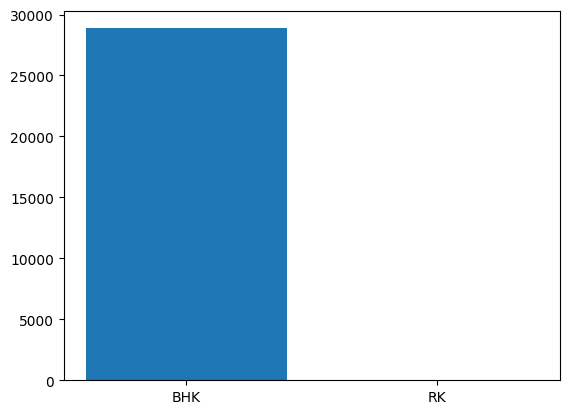

In [22]:
print(df["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],df["BHK_OR_RK"].value_counts())

We can drop this column of BHK_OR_RK as it is not useful for our model.

In [23]:
df.drop("BHK_OR_RK",axis=1,inplace=True) ;
df.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


Created a new feature 'CITY' by extracting the city name from the 'ADDRESS' column.


In [24]:
df["CITY"] = df["ADDRESS"].str.split(",").str[-1]
df.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


Remove the entries where that city has occured less than 5 times 


In [25]:

city_counts = df["CITY"].value_counts()
df = df[df["CITY"].isin(city_counts[city_counts>5].index)]

df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
28891,Owner,0,0,3,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
28892,Owner,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
28893,Dealer,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
28894,Owner,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


From the classification report of the cities as mentioned in https://en.wikipedia.org/wiki/Classification_of_Indian_cities we can see that the cities are classified into 3 categories. We will create a new feature 'city_tier' based on this classification.

In [26]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 1
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 2
    else:
        return 3
    
df['city_tier'] = df['CITY'].apply(map_city)
df.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,1
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,2
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,1
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,2
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,1


Adding a new field 'CITY_AVG' which is the average price of the city.

In [27]:
for city in df['CITY'].unique():
    # Finding avg price of each city
    avg_price = df[df['CITY'] == city]['TARGET(PRICE_IN_LACS)'].mean()  

    df.loc[df['CITY'] == city, 'CITY_AVG'] = avg_price




# Removing Outliers 

(array([3.200e+01, 2.470e+02, 9.670e+02, 1.399e+03, 2.103e+03, 2.121e+03,
        1.963e+03, 2.001e+03, 1.600e+03, 1.911e+03, 1.350e+03, 1.249e+03,
        1.136e+03, 9.120e+02, 1.204e+03, 6.790e+02, 1.031e+03, 2.000e+00,
        7.960e+02, 6.520e+02, 0.000e+00, 5.970e+02, 0.000e+00, 4.390e+02,
        4.430e+02, 0.000e+00, 4.110e+02, 0.000e+00, 3.580e+02, 2.920e+02,
        0.000e+00, 2.280e+02, 0.000e+00, 1.940e+02, 1.830e+02, 0.000e+00,
        1.960e+02, 0.000e+00, 1.780e+02, 1.500e+02, 0.000e+00, 1.680e+02,
        0.000e+00, 1.150e+02, 1.440e+02, 1.000e+00, 1.130e+02, 0.000e+00,
        7.100e+01, 1.100e+02, 0.000e+00, 6.900e+01, 0.000e+00, 8.800e+01,
        5.700e+01, 0.000e+00, 4.100e+01, 0.000e+00, 6.700e+01, 4.800e+01,
        0.000e+00, 5.100e+01, 0.000e+00, 3.800e+01, 3.800e+01, 0.000e+00,
        3.600e+01, 0.000e+00, 2.900e+01, 3.500e+01, 0.000e+00, 1.800e+01,
        0.000e+00, 1.500e+01, 3.700e+01, 0.000e+00, 1.300e+01, 0.000e+00,
        2.100e+01, 1.500e+01, 0.000e+0

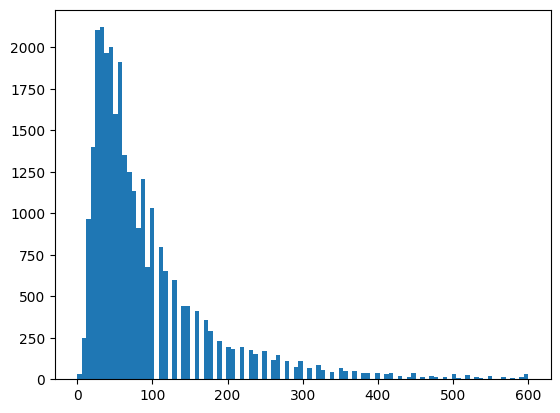

In [28]:
plt.hist(df["TARGET(PRICE_IN_LACS)"],bins=100)


In [29]:
df["TARGET(PRICE_IN_LACS)"].describe()

count    28650.000000
mean        87.160737
std         82.298351
min          0.250000
25%         37.700000
50%         60.000000
75%        100.000000
max        600.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [30]:
Q1 = df["TARGET(PRICE_IN_LACS)"].quantile(0.25)
Q3 = df["TARGET(PRICE_IN_LACS)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = min(df["TARGET(PRICE_IN_LACS)"])
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

62.3
0.25 193.45


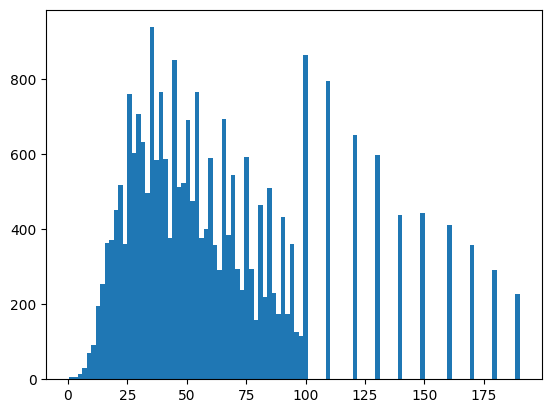

In [31]:
# Printing the number of outliers
df[(df["TARGET(PRICE_IN_LACS)"] < lower_bound) | (df["TARGET(PRICE_IN_LACS)"] > upper_bound)]
# Plotting without outliers
plt.hist(df[(df["TARGET(PRICE_IN_LACS)"] > lower_bound) & (df["TARGET(PRICE_IN_LACS)"] < upper_bound)]["TARGET(PRICE_IN_LACS)"], bins=100)
# Removing outliers
df = df[(df["TARGET(PRICE_IN_LACS)"] > lower_bound) & (df["TARGET(PRICE_IN_LACS)"] < upper_bound)]

Converting categorical features to numerical using one-hot encoding and dropping the original columns.

<Axes: >

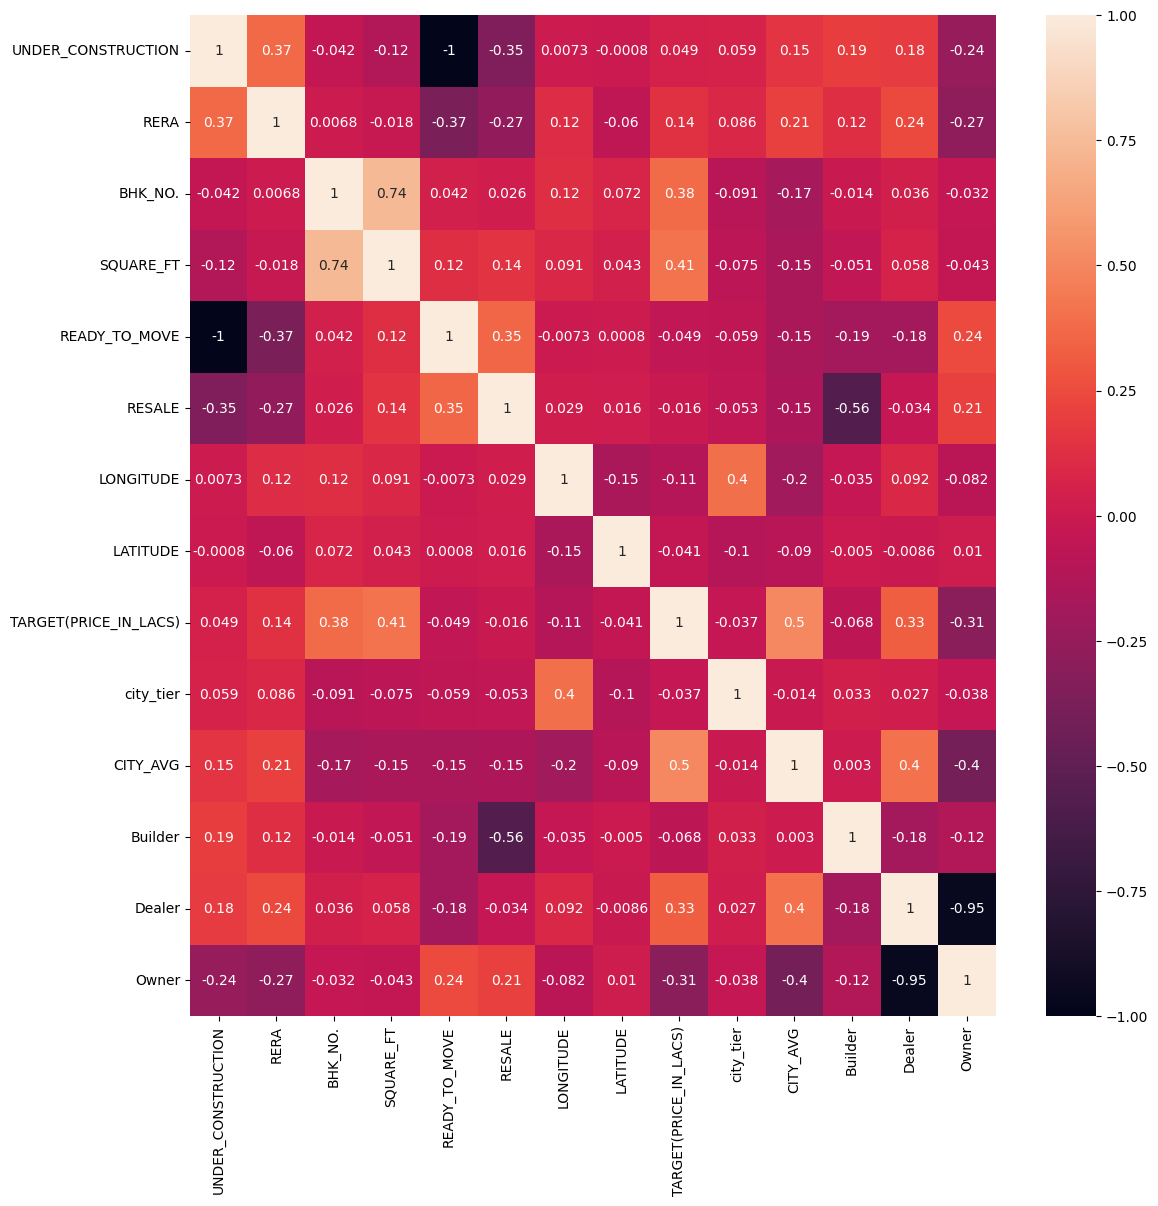

In [32]:
df = df.join(pd.get_dummies(df.POSTED_BY , dtype=int))
df.drop(["ADDRESS" , "POSTED_BY"],axis=1,inplace=True) ;
import seaborn as sns
plt.figure(figsize=(13,13))
# excluding non numeric columns from df 
num_df = df.select_dtypes(exclude='object')

num_df['SQUARE_FT'] = np.log(num_df['SQUARE_FT'])

sns.heatmap(num_df.corr(),annot=True)


In [33]:
# export the cleaned data
num_df.to_csv('../../data/Property Value Regression/train_cleaned.csv', index=False)